#1.Analyse the data using the visualizations

In [16]:
import pandas as pd   # import liabrary.

df = pd.read_csv("https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/Zoo.csv") # Load the Dataset.

df #Display the dataset.

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


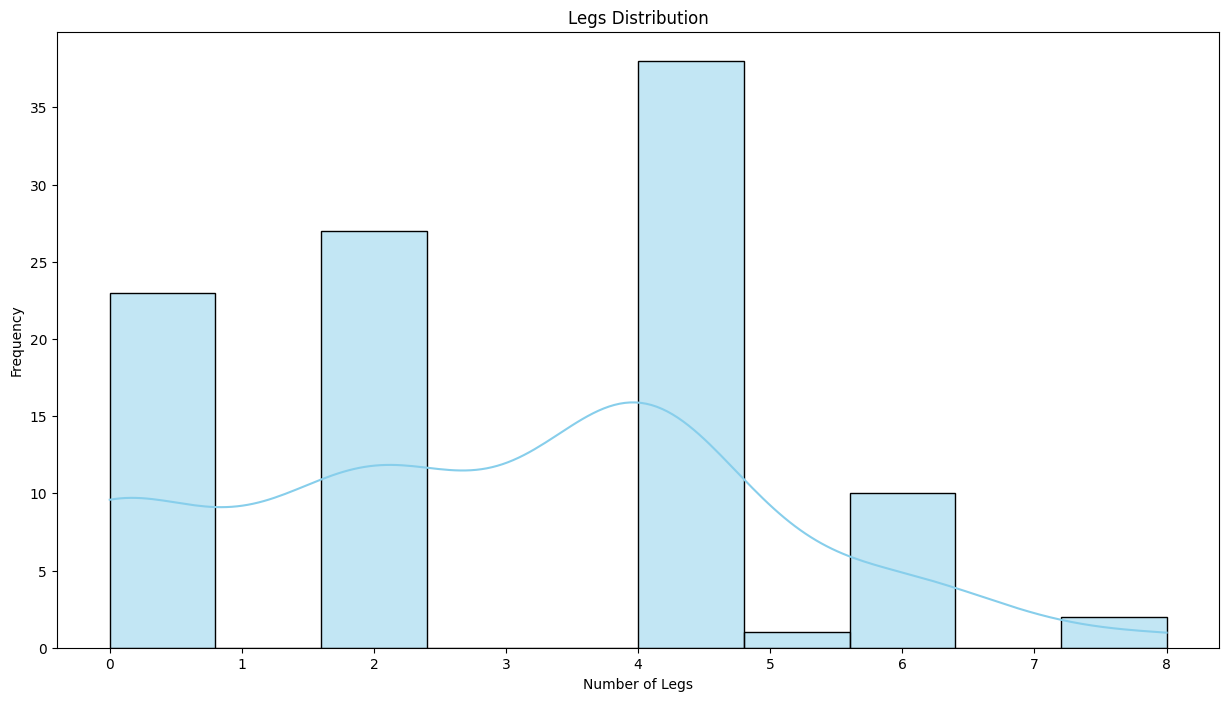

In [17]:
import matplotlib.pyplot as plt   # Import the necessary libraries.
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings.

# Set up the visualizations.
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed.

# Visualize the distribution of the 'legs' feature.
sns.histplot(df['legs'], kde=True, color="skyblue") #Histogram.
plt.title('Legs Distribution')  # The majority of animals have 0, 2, or 4 legs, with fewer animals having 6 or 8 legs.
plt.xlabel('Number of Legs')
plt.ylabel('Frequency')
plt.show()

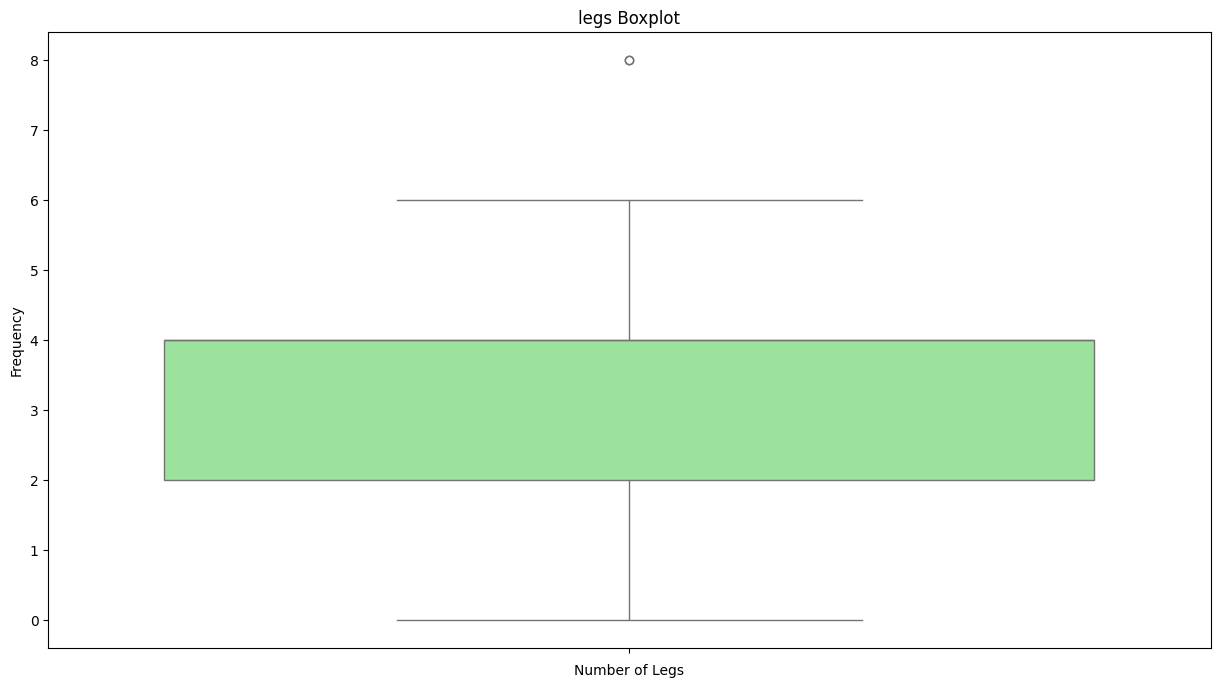

In [18]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed.

sns.boxplot(df['legs'], color = 'lightgreen') #Boxplot.
plt.title('legs Boxplot') # Set the title of the plot.
plt.xlabel('Number of Legs')    # Here animals range from 0 to 8 legs.
plt.ylabel('Frequency')
plt.show()

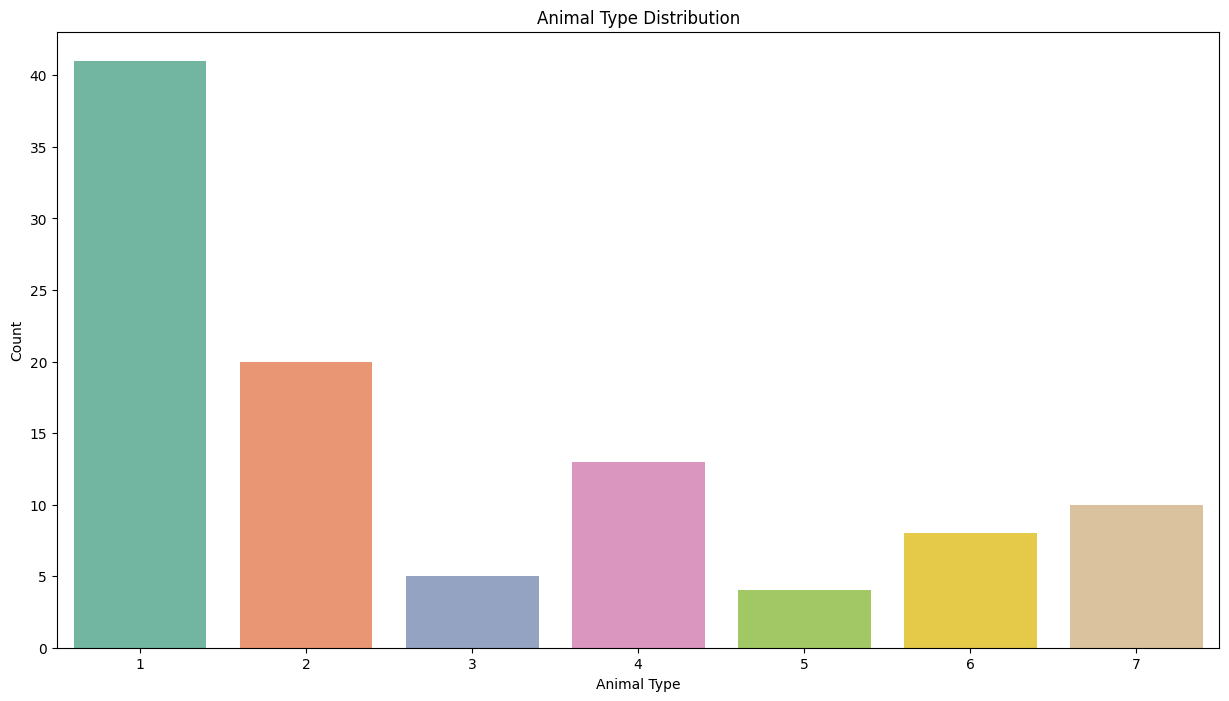

In [19]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed.

sns.countplot(x='type', data=df, palette="Set2")  #Countplot. Return all unique colors in a categorical Color Brewer palette:Set2. Type of palette- sns.color_palette("pastel"),("husl", 9),("Spectral", as_cmap=True),
plt.title('Animal Type Distribution')  # Set the title of the plot.
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

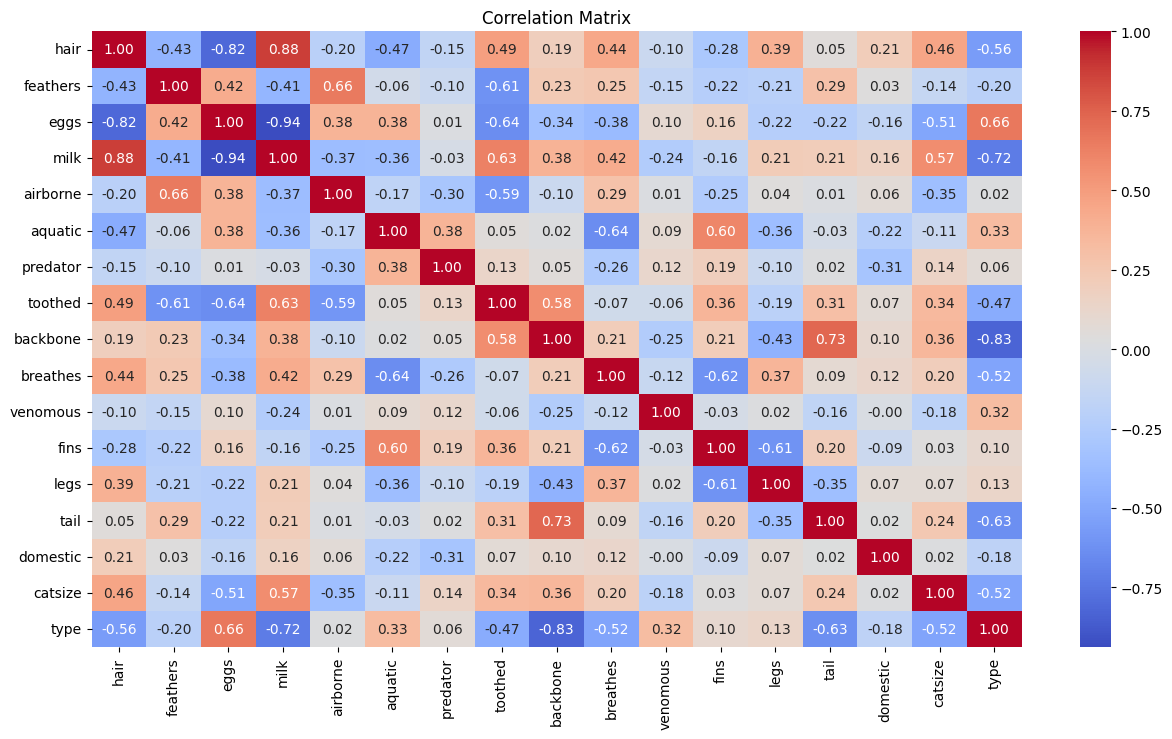

In [20]:
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed.

sns.heatmap(df.drop(columns=['animal name']).corr(), annot=True, fmt=".2f", cmap="coolwarm")  #Heatmap. The heatmap shows that there are some strong correlations between certain features,
plt.title('Correlation Matrix')  # Set the title of the plot.
plt.show()  # Display the plot.

#2.Preprocess the data by handling missing values & Outliers, if any.

In [21]:
df.head()  # Display the first five rows of the DataFrame.

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
df.info()  # Display information about the DataFrame, including data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [23]:
df.isnull().sum()  # Check for missing values in the DataFrame.
# No missing values are present in this dataset.

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [24]:
df.describe()  # Generate descriptive statistics of the DataFrame.

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


#3.Split the dataset into training and testing sets (80% training, 20% testing).


In [25]:
from sklearn.model_selection import train_test_split  # Import the necessary function from scikit-learn.

df = df.drop(columns=['animal name'])  # Drop the animal name column from the DataFrame. animal name it is a string value,

# Split the data into training-80% and testing-20%.
x = df.drop(columns = ['type'])  # Create x
y = df['type']  # Create y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  # Split the data into training and testing sets.


#4.Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [11]:
!pip install scikit-learn  # Install the scikit-learn library.

In [28]:
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier class from scikit-learn.
from sklearn.metrics import accuracy_score  # Import the necessary functions from scikit-learn.

knn = KNeighborsClassifier(n_neighbors=3)  # Create an instance of the KNeighborsClassifier class with 3 neighbors.

knn.fit(x_train, y_train)  # Fit the model to the training data.

y_pred = knn.predict(x_test)  # Make predictions on the test data.

accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model.

#accuracy  # Print the accuracy of the model.

print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy in percentage format.

Accuracy: 95.24%


In [29]:
# OR
# I can experiment with different values of k to improve accuracy.

for k in range(1, 10):  # Iterate through different values of k from 1 to 9.
    knn = KNeighborsClassifier(n_neighbors=k)  # Create an instance of the KNeighborsClassifier class with the current value of k.
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k={k}, Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy for each value of k.

k=1, Accuracy: 100.00%
k=2, Accuracy: 100.00%
k=3, Accuracy: 95.24%
k=4, Accuracy: 95.24%
k=5, Accuracy: 90.48%
k=6, Accuracy: 90.48%
k=7, Accuracy: 85.71%
k=8, Accuracy: 85.71%
k=9, Accuracy: 85.71%


#5.Choose an appropriate distance metric and value for K.

**Type of the Distance Metric -**

KNN commonly uses Euclidean distance, but depending on the data, other distance metrics might be more appropriate. Here are a few common ones:

1) Euclidean Distance (default in KNN) : Suitable for continuous features. It is defined as:

d(x,y) = sqrt ∑i=1n(xi−yi)2

2) Manhattan Distance : This is useful when you want to minimize the effect of large differences in single dimensions. It is defined as:

d(x,y) = ∑i=1n ∣xi−yi∣

3) Minkowski Distance : A generalized form of Euclidean and Manhattan distances. It has a parameter pp that defines the metric:

d(x,y) = (∑i=1n ∣xi−yi∣ p)1/p

4) Hamming Distance : Useful for categorical data. It measures the number of feature positions where two objects differ.

 **Choosing the Value of kk -**

Small kk values (like 1, 3, 5) - make the model sensitive to noise and outliers but can capture complex patterns.                                                
Large kk values (like 7, 9, 11) - smooth the decision boundary and make the model more robust to noise, but may oversimplify the data.

In [30]:
k_values = [3, 5, 7, 9]  # Defined a list of k values to experiment.
distance_metrics = ['euclidean', 'manhattan', 'minkowski']  # Defined a list of distance metrics.

for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)  # Created a KNN
        knn.fit(x_train, y_train)  # Fitted the model to the training data.
        y_pred = knn.predict(x_test)  # Make predictions on the test data.
        accuracy = accuracy_score(y_test, y_pred)  # Calculated the accuracy.
        print(f"k = {k}, metric = {metric}, Accuracy: {accuracy * 100:.2f}%")  # Print the results.

k = 3, metric = euclidean, Accuracy: 95.24%
k = 5, metric = euclidean, Accuracy: 90.48%
k = 7, metric = euclidean, Accuracy: 85.71%
k = 9, metric = euclidean, Accuracy: 85.71%
k = 3, metric = manhattan, Accuracy: 95.24%
k = 5, metric = manhattan, Accuracy: 95.24%
k = 7, metric = manhattan, Accuracy: 85.71%
k = 9, metric = manhattan, Accuracy: 85.71%
k = 3, metric = minkowski, Accuracy: 95.24%
k = 5, metric = minkowski, Accuracy: 90.48%
k = 7, metric = minkowski, Accuracy: 85.71%
k = 9, metric = minkowski, Accuracy: 85.71%


In [31]:
for p in [1, 2, 3]:  # Iterating through various values ​​of p for the Minkowski distance.
    knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=p)  # Created a KNN
    knn.fit(x_train, y_train)  # Fitted the model to the training data.
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Minkowski distance (p={p}), Accuracy: {accuracy * 100:.2f}%")  # Print the results.

Minkowski distance (p=1), Accuracy: 95.24%
Minkowski distance (p=2), Accuracy: 95.24%
Minkowski distance (p=3), Accuracy: 95.24%


#6.Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Import necessary liabraries.

y_pred = knn.predict(x_test)  #knn has already been trained on the training set

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') #'weighted': Averages the metric over all classes, giving more importance to classes with varying sizes.
recall = recall_score(y_test, y_pred, average='weighted') #'macro': Averages the metric over all classes without considering class imbalance.
f1 = f1_score(y_test, y_pred, average='weighted')   #'micro': Calculates the metrics globally by counting the total true positives, false negatives, and false positives.

#By using the weighted average, you handle class imbalances more effectively, ensuring that performance on each class contributes proportionally to the final metric.

# All Print the results in percentage.
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Accuracy: 95.24%
Precision: 92.06%
Recall: 95.24%
F1-Score: 93.33%


In [35]:
class_report = classification_report(y_test, y_pred)  # Generated a classification report.
print(class_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



#7.Visualize the decision boundaries of the classifier.

A decision boundary is a line or surface that separates different regions in data space. It is used to make decisions about which class a new data point belongs to.
Decision boundary in machine learning is a key term since it characterizes the surface that divides feature space into distinct groups of data points.
The decision boundary in the k-Nearest Neighbors (k-NN) algorithm is a fundamental concept that defines how the algorithm classifies data points in a feature space

In [38]:
#let's take 'hair' and 'milk' as features (just for visualization purposes)
x_train_2d = x_train[['hair', 'milk']]  # Created a new DataFrame with only the selected features.
x_test_2d = x_test[['hair', 'milk']]

In [39]:
#Now, retrained your KNN classifier using just these two features.
knn_2d = KNeighborsClassifier(n_neighbors=3)  # Created a KNN
knn_2d.fit(x_train_2d, y_train)

KNeighborsClassifier(n_neighbors=3)

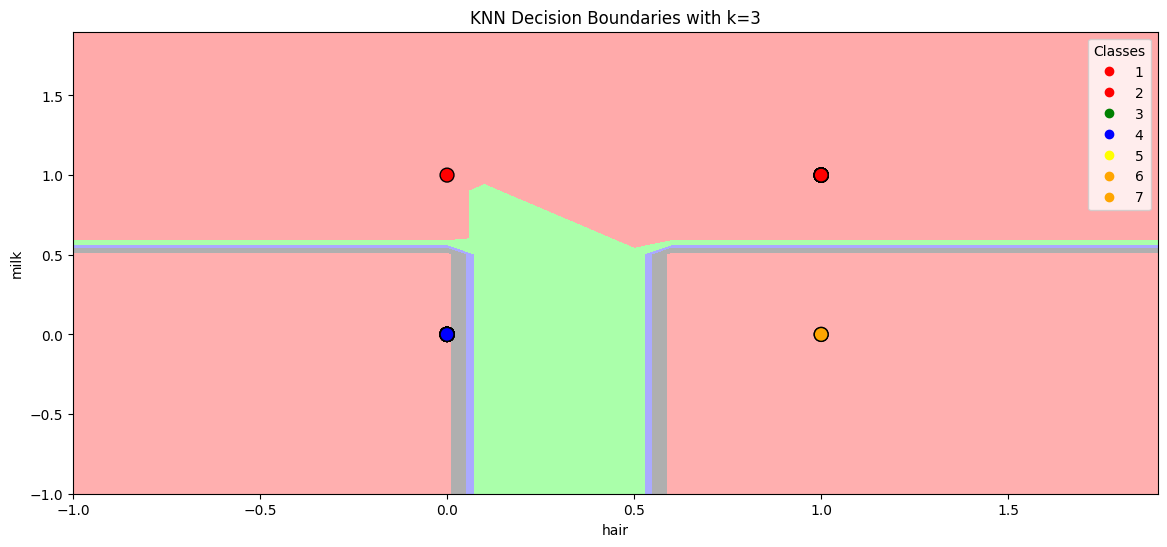

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Creating a mesh grid
x_min, x_max = x_train_2d.iloc[:, 0].min() - 1, x_train_2d.iloc[:, 0].max() + 1
y_min, y_max = x_train_2d.iloc[:, 1].min() - 1, x_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))  # Created a grid of points.

# Predicting the class for each point in the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Creating a color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF', '#FFAFAF'])
cmap_bold = ['red', 'green', 'blue', 'yellow', 'orange']

plt.figure(figsize=(14, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)  # Plotting the decision boundaries.

# Plotting the training data points.
scatter = plt.scatter(x_train_2d.iloc[:, 0], x_train_2d.iloc[:, 1], c=y_train, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)  #Scatter plot.
plt.xlabel('hair')
plt.ylabel('milk')
plt.title('KNN Decision Boundaries with k=3')
plt.legend(*scatter.legend_elements(), title="Classes")  # Adding a legend.
plt.show()

Visualizing decision boundaries for a classifier like K-Nearest Neighbors (KNN) is useful when your data has two features (for easy 2D plotting). but I have more than two features,  so i'll need to reduce the dataset dimensions (e.g., via PCA) for visualization.

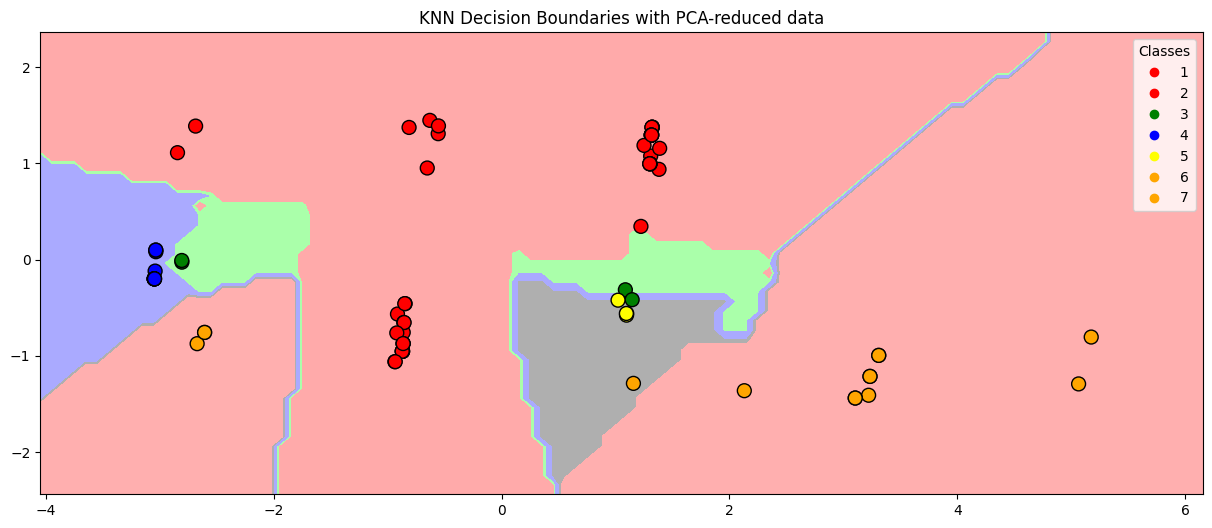

In [46]:
from sklearn.decomposition import PCA

# Reducing the dataset to 2 dimensions
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train the KNN classifier on the reduced dataset
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(x_train_pca, y_train)

# Create the mesh grid and plot the decision boundary as before
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(15, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=ListedColormap(cmap_bold), edgecolor='k', s=100)
plt.title('KNN Decision Boundaries with PCA-reduced data')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

#Interview Questions :

**1.What are the key hyperparameters in KNN?**

Ans - Key Hyperparameters in K-Nearest Neighbors (KNN) :

KNN has several important hyperparameters that can significantly affect the model's performance:

**Number of Neighbors (k) :**                                                        
This is the number of nearest neighbors to include when making predictions. The choice of kk impacts bias-variance tradeoff.                                     
Small kk (e.g., 1, 3, 5) can capture local structure but may be more sensitive to noise and outliers (low bias, high variance).                                 
Large kk (e.g., 7, 9, 15) can smooth the decision boundary, making the model more robust but potentially ignoring local variations (high bias, low variance).                                                                       

**Distance Metric :**                                                                 
This defines how the distance between points is calculated. The most common distance metrics include Euclidean and Manhattan.                                                                                                                                                     
p (for Minkowski Distance) :
This defines the power parameter when using Minkowski distance, allowing for a generalization of Euclidean and Manhattan distances.                             
p=1p=1: Corresponds to Manhattan distance.                                       
p=2p=2: Corresponds to Euclidean distance.

**Weighting of Neighbors (weights):**

KNN can assign different weights to neighbors based on distance.                 
Uniform: All neighbors have equal weight.                                        
Distance: Closer neighbors contribute more to the prediction than farther ones.

**Algorithm for Computing Neighbors (algorithm):**

Determines the method used to compute nearest neighbors:                         
'auto': Lets the algorithm decide the best approach.                             
'ball_tree': Efficient for high-dimensional data.                                
'kd_tree': Efficient for low-dimensional data.                                   
'brute': Exhaustive search method, useful for smaller datasets.

**2.What distance metrics can be used in KNN?**

Ans - The choice of distance metric is critical in KNN, as it determines how the "closeness" of neighbors is measured. Below are common distance metrics :

**Euclidean Distance (default) :**                                                 
Most commonly used for continuous features.                                      
Formula = d(x,y) = sqrt ∑i=1n(xi−yi)2

**Manhattan Distance (L1 distance) :**                                               
Useful when you want to minimize the influence of large differences in individual features. It's the sum of the absolute differences between points.    
Formula :
d(x,y) = ∑ i=1 n ∣xi−yi∣

**Minkowski Distance :**                                                     
A generalization of both Euclidean and Manhattan distances. The formula depends on a parameter pp, and by adjusting pp, you can control the behavior of the distance metric.                                       
Formula :
d(x,y) = (∑ i=1 n ∣xi−yi∣p) 1/p

p=1p=1 → Manhattan distance.                                    
p=2p=2 → Euclidean distance.

**Hamming Distance :**                                                              
Used for categorical data. It counts the number of positions where the two feature vectors differ.                              
Formula :
d(x,y)=∑i=1n[xi≠yi]                             
Where [xi≠yi][xi​=yi​] is 1 if xi and yi are different, otherwise 0.

**Cosine Similarity :**                                          
Measures the cosine of the angle between two vectors. It is commonly used for text data and high-dimensional datasets.                     
Formula :
cosine(x,y) = x⋅y / ∣∣x∣∣ ∣∣y∣∣


Where x⋅y is the dot product and ∣∣x∣∣ is the magnitude of vector x.
